<a href="https://colab.research.google.com/github/UNCG-CSE/COVID-Team-2/blob/master/src/raiana/Project_stage2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Stage - II (Data Modeling and Hypothesis Testing)



**Goals**
The goal of Stage II is to develop formal hypothesis tests for the intuitions you had in Stage I and utilize statistical modeling to prove/disprove them.


In [ ]:
#Using to mount google drive as i am using google colab for this assignment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import seaborn as sns
import math
import datetime as datetime


# Fit a distribution to the number of COVID-19 cases of New York state.
* Graphically plot the distribution and describe the distribution statistics.
* Describe why the distribution was choosen and its statistics in the report and the notebook.







In [ ]:
#read file for NYC 
NYC_df =  pd.read_csv("/content/drive/My Drive/Datascience/COVID-Team-2/src/raiana/raiana.mergedData.csv")

print(NYC_df.head())

   Unnamed: 0  countyFIPS  ... NUM_LICENSED_BEDS NUM_ICU_BEDS
0           0           0  ...             120.0           21
1           1           0  ...             161.0           14
2           2           0  ...              74.0            4
3           3           0  ...             253.0           21
4           4           0  ...             225.0           35

[5 rows x 494 columns]


In [ ]:
# Get the cases of NY, and make a daily dataframe.
NY_cases = NYC_df[NYC_df['State']=='NY']

# total number of confirmed case and death
dates = [col.split('_')[1] for col in NY_cases.columns if 'confirmed' in col]
data = []
for col in [col for col in NY_cases.columns if 'confirmed' in col]:
    date = col.split('_')[1]
    col_deaths = f'deaths_{date}'
    data.append([date, sum(NY_cases[col]), sum(NY_cases[col_deaths])])
DF_DAILY = pd.DataFrame(data, columns=['date', 'cases', 'deaths',])
DF_DAILY["date"] = DF_DAILY["date"].astype("datetime64") 

# Now, all the columns of dates are rows.
DF_DAILY
#DF_DAILY.to_excel("DF_DAILY.xls")

,date,cases,deaths
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
237,2020-09-15,5638358,446121
238,2020-09-16,5645973,446335
239,2020-09-17,5655709,446395
240,2020-09-18,5664305,446473


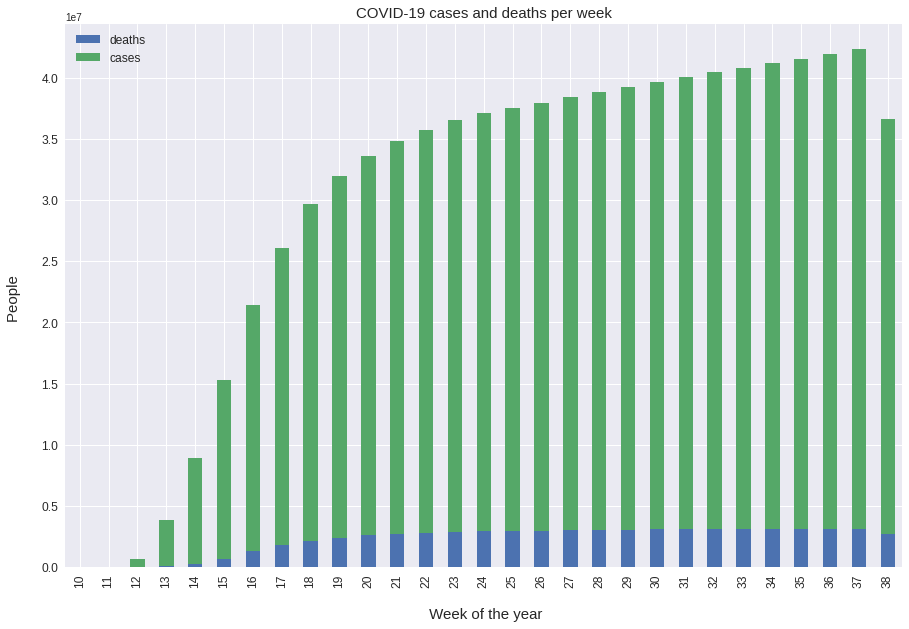

In [ ]:
# Plot the distribution of confirmed covid cases by week
plt.style.use('seaborn')

DF_WEEK = DF_DAILY.copy()

#converting dates into weeks 
DF_WEEK['date'] = DF_WEEK['date'].dt.isocalendar().week
DF_WEEK = DF_WEEK[DF_WEEK['cases']>0]
DF_WEEK.set_index('date', inplace=True)


ax = DF_WEEK.groupby(level='date').agg({'deaths': 'sum', 'cases': 'sum'}).plot.bar(stacked=True, figsize=(15,10), fontsize=12)
ax.set_xlabel("\n Week of the year", fontsize=15)
ax.set_ylabel("People \n", fontsize=15)
ax.set_title("COVID-19 cases and deaths per week", fontsize=15)
ax.legend(prop=dict(size=12))



This graph shows how since the first COVID cases were confirmed in New York until now, the number of cases and deaths has been growing. As we can see, the number of confirmed cases grew at a very high rate, while deaths grew a lot at first, but from week 20, they stabilized. This may be due to the turnover of people occupying beds and also to the fact that the number of beds in hospitals increased.I decided to show the distribution by weeks because it is a considerable time to see the pandemic advanze and alsits the time in the majority of people in which they leave the hospitals.

#Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states.

In [ ]:
# Filter states
cases_in_cities = NYC_df[NYC_df['State'].isin(['NY', 'NC', 'PA', 'IL', 'OH', 'GA'])]

# Group by states and sum the population of each county to get the population of the state.
population = cases_in_cities.groupby(['State', 'countyFIPS']).agg({'population': 'max'}).groupby('State').sum()
population = population.reset_index()

In [ ]:
# Prepare the data by state, looping the columns of dates.
data = []
population_dict = {
    'NY': population[population['State']=='NY']['population'].values[0],
    'NC': population[population['State']=='NC']['population'].values[0],
    'PA': population[population['State']=='PA']['population'].values[0],
    'OH': population[population['State']=='OH']['population'].values[0],
    'IL': population[population['State']=='IL']['population'].values[0],
    'GA': population[population['State']=='GA']['population'].values[0]
}

# For each state, we loop for all the states and dates, to create a new dataset with all the dates for each state.
for state in ['NY', 'NC', 'PA', 'IL', 'OH', 'GA']:
    for col in [col for col in cases_in_cities.columns if 'confirmed' in col]:
        date = col.split('_')[1]
        col_deaths = f'deaths_{date}'
        data.append([date, state, population_dict[state], sum(cases_in_cities[cases_in_cities['State']==state][col]), sum(cases_in_cities[cases_in_cities['State']==state][col_deaths])])

DF_STATES = pd.DataFrame(data, columns=['date', 'state', 'population', 'cases', 'deaths'])
DF_STATES['cases_per_1000'] = (1000 * DF_STATES['cases'])/DF_STATES['population']
DF_STATES['deaths_per_1000'] = (1000 * DF_STATES['deaths'])/DF_STATES['population']
DF_STATES['date'] = pd.to_datetime(DF_STATES['date'])
DF_STATES['day'] = DF_STATES['date'].dt.day
DF_STATES['week'] = DF_STATES['date'].dt.week
DF_STATES['month'] = DF_STATES['date'].dt.month
DF_STATES['year'] = DF_STATES['date'].dt.year
#DF_STATES['cases_per_1000'] = DF_STATES['cases_per_1000'].round(0).astype(int) 
#DF_STATES['deaths_per_1000'] = DF_STATES['deaths_per_1000'].round(0).astype(int)

DF_STATES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,date,state,population,cases,deaths,cases_per_1000,deaths_per_1000,day,week,month,year
0,2020-01-22,NY,19258534,0,0,0.000000,0.000000,22,4,1,2020
1,2020-01-23,NY,19258534,0,0,0.000000,0.000000,23,4,1,2020
2,2020-01-24,NY,19258534,0,0,0.000000,0.000000,24,4,1,2020
3,2020-01-25,NY,19258534,0,0,0.000000,0.000000,25,4,1,2020
4,2020-01-26,NY,19258534,0,0,0.000000,0.000000,26,4,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
1447,2020-09-15,GA,9648272,1604456,27085,166.294648,2.807238,15,38,9,2020
1448,2020-09-16,GA,9648272,1616784,27169,167.572390,2.815945,16,38,9,2020
1449,2020-09-17,GA,9648272,1623407,27404,168.258834,2.840301,17,38,9,2020
1450,2020-09-18,GA,9648272,1627069,27615,168.638384,2.862171,18,38,9,2020


In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
import pandas.util.testing as tm
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Create the training and testing datasets
mask = np.random.rand(len(DF_STATES)) < 0.8

# Separate training and testing.
df_train = DF_STATES[mask]
df_test = DF_STATES[~mask]

# Variable to predict and variables to predict it.
expr_cases_per_1000 = """cases_per_1000 ~ day  + month + year + state + population"""
expr_deaths_per_1000 = """deaths_per_1000 ~ day  + month + year + state + population"""


# Split to predict cases
y_train_cases, X_train_cases = dmatrices(expr_cases_per_1000, df_train, return_type='dataframe')
y_test_cases, X_test_cases = dmatrices(expr_cases_per_1000, df_test, return_type='dataframe')

# Split to predict deaths
y_train_deaths, X_train_deaths = dmatrices(expr_deaths_per_1000, df_train, return_type='dataframe')
y_test_deaths, X_test_deaths = dmatrices(expr_deaths_per_1000, df_test, return_type='dataframe')

#Using the statsmodels GLM class, train the Poisson regression model on the training data set. Train to predict cases
poisson_training_cases_results = sm.GLM(y_train_cases, X_train_cases, family=sm.families.Poisson()).fit()

#Train to predict deaths
poisson_training_deaths_results = sm.GLM(y_train_deaths, X_train_deaths, family=sm.families.Poisson()).fit()

#print(poisson_training_cases_results.summary())
#print(poisson_training_deaths_results.summary())

In [ ]:
#Lets make some predictions on the test data set to test how it works.

# Cases
poisson_predictions = poisson_training_cases_results.get_prediction(X_test_cases)
predictions_summary_frame = poisson_predictions.summary_frame()
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test_cases['cases_per_1000']

# Deaths
poisson_predictions_deaths = poisson_training_deaths_results.get_prediction(X_test_deaths)
predictions_summary_frame_deaths = poisson_predictions_deaths.summary_frame()
predicted_counts_deaths=predictions_summary_frame_deaths['mean']
actual_counts_deaths = y_test_deaths['deaths_per_1000']


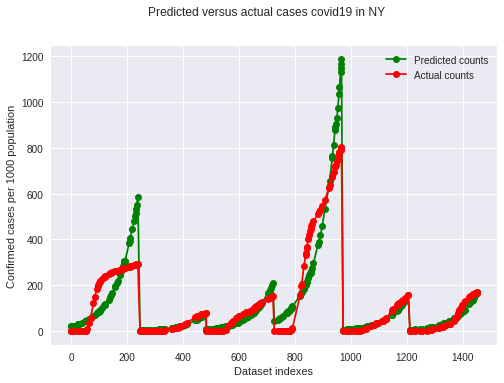

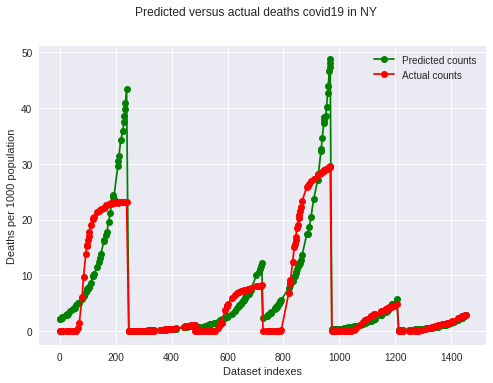

In [ ]:
# Plot prediction vs reality
fig = plt.figure()
fig.suptitle('Predicted versus actual cases covid19 in NY')
predicted, = plt.plot(X_test_cases.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test_cases.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.xlabel('Dataset indexes')
plt.ylabel('Confirmed cases per 1000 population')
plt.show()
# It is very similar, probabbly overfitting a bit.


# Plot prediction vs reality deaths
fig = plt.figure()
fig.suptitle('Predicted versus actual deaths covid19 in NY')
predicted_deaths, = plt.plot(X_test_deaths.index, predicted_counts_deaths, 'go-', label='Predicted counts')
actual_deaths, = plt.plot(X_test_deaths.index, actual_counts_deaths, 'ro-', label='Actual counts')
plt.legend(handles=[predicted_deaths, actual_deaths])
plt.xlabel('Dataset indexes')
plt.ylabel('Deaths per 1000 population')
plt.show()

In [ ]:
# Lets get all the days that we must predict.
import datetime, calendar
year = 2020
months = [9,10,11,12]
days = []
for month in months:
    num_days = calendar.monthrange(year, month)[1]
    for day in range(1, num_days+1):
        if (day<=20 and month==9):
            continue
        else:
            days.append([datetime.datetime(year, month, day)])

In [ ]:
def create_data_to_predict(state, days):
    ''' This function creates the data for each state'''
    df_predict = pd.DataFrame(days, columns=['date'])
    df_predict['state'] = state
    df_predict['day'] = df_predict['date'].dt.day
    df_predict['month'] = df_predict['date'].dt.month
    df_predict['year'] = df_predict['date'].dt.year
    df_predict['population'] = DF_STATES[DF_STATES['state']==state]['population'].values[0]
    df_predict['cases_per_1000']  = 0
    df_predict['deaths_per_1000']  = 0
    return df_predict
  
# Create all the dates that we must predict and put it all together.
df_predict_ny = create_data_to_predict('NY', days)
df_predict_il = create_data_to_predict('IL', days)
df_predict_ga = create_data_to_predict('GA', days)
df_predict_pa = create_data_to_predict('PA', days)
df_predict_nc = create_data_to_predict('NC', days)
df_predict_oh = create_data_to_predict('OH', days)

frames = [df_predict_ny, df_predict_il, df_predict_ga, df_predict_pa, df_predict_nc, df_predict_oh]
df_predictions = pd.concat(frames)

In [ ]:
# Split the data, we want to predict X_test and X_test_deaths
y_test, X_test = dmatrices(expr_cases_per_1000, df_predictions, return_type='dataframe')

# Deaths
y_test_deaths, X_test_deaths = dmatrices(expr_deaths_per_1000, df_predictions, return_type='dataframe')

# Make predictions (cases)
poisson_predictions_all_states = poisson_training_cases_results.get_prediction(X_test)
predictions_summary_frame_states = poisson_predictions_all_states.summary_frame()
predicted_counts_states = predictions_summary_frame_states['mean']

# Make predictions (deaths)
poisson_predictions_all_states_deaths = poisson_training_deaths_results.get_prediction(X_test_deaths)
predictions_summary_frame_states_deaths = poisson_predictions_all_states_deaths.summary_frame()
predicted_counts_states_deaths = predictions_summary_frame_states_deaths['mean']


In [ ]:
# We complete our dataframe with the predicted values.
df_predictions['cases_per_1000'] = predicted_counts_states

# We complete our dataframe with the predicted values.
df_predictions['deaths_per_1000'] = predicted_counts_states_deaths

In [ ]:
# We join all our previous data with our results.
final_result = [DF_STATES, df_predictions]
final_result = pd.concat(final_result)
final_result['cases_per_1000'] = final_result['cases_per_1000'].apply(lambda x: x if x<=1000 else 1000)
final_result['deaths_per_1000'] = final_result['deaths_per_1000'].apply(lambda x: x if x<=1000 else 1000)

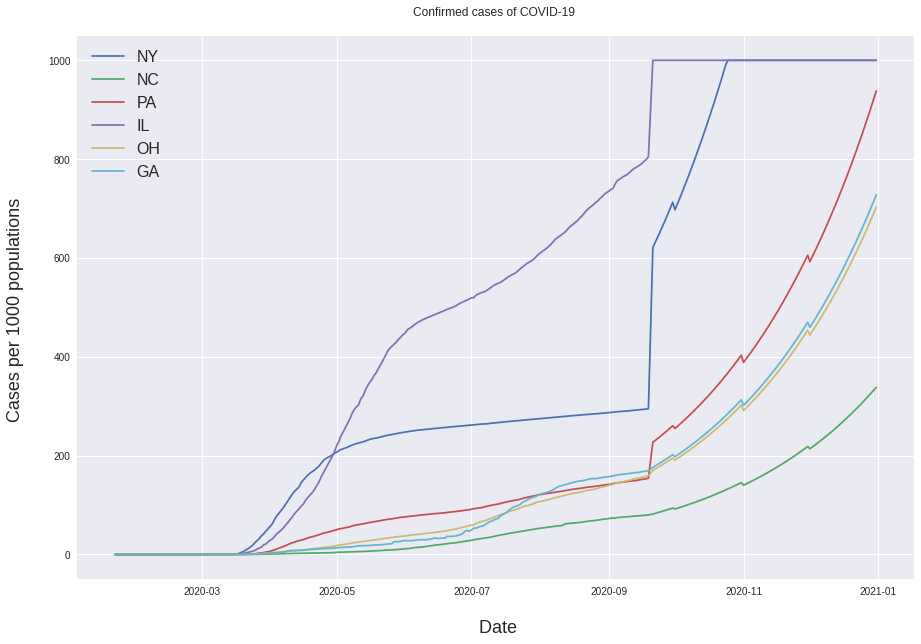

In [ ]:
# Plot all the data, original and predicted to see the whole year.
fig,ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.set_title('Confirmed cases of COVID-19 \n')
#ax1.set_xlim([0,30])

for state in ['NY', 'NC', 'PA', 'IL', 'OH', 'GA']:
    ax1.plot(final_result[(final_result.state==state)].date,\
            final_result[(final_result.state==state)].cases_per_1000,\
            label=state)


ax1.set_xlabel("\n Date", fontsize=18)
ax1.set_ylabel("Cases per 1000 populations \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)




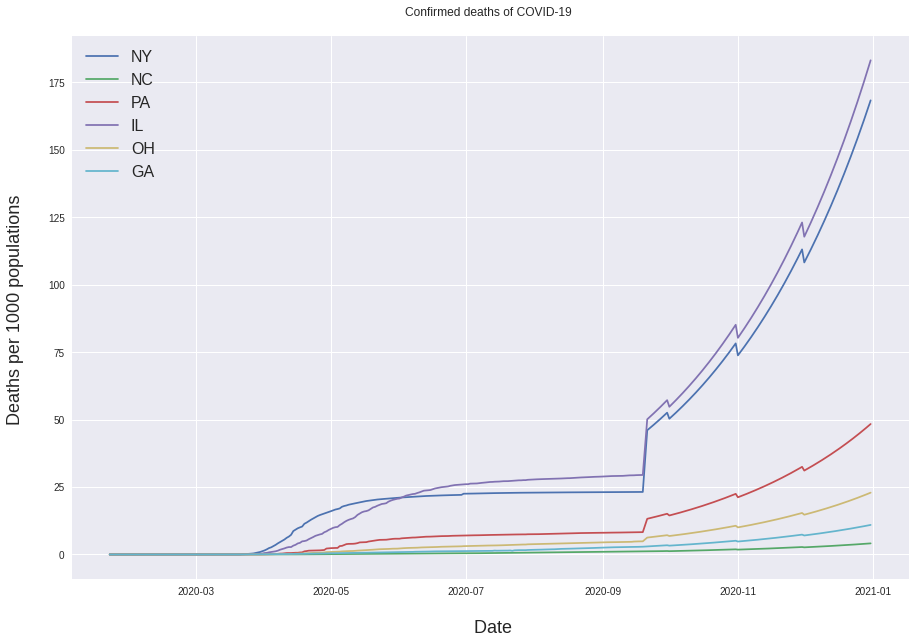

In [ ]:
#Deaths

# Plot all the data, original and predicted to see the whole year.
fig,ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.set_title('Confirmed deaths of COVID-19 \n')
#ax1.set_xlim([0,30])

for state in ['NY', 'NC', 'PA', 'IL', 'OH', 'GA']:
    ax1.plot(final_result[(final_result.state==state)].date,\
            final_result[(final_result.state==state)].deaths_per_1000,\
            label=state)


ax1.set_xlabel("\n Date", fontsize=18)
ax1.set_ylabel("Deaths per 1000 populations \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)


 Here, using poisson distribution to predict the confirmed cases of the next months, we can see that NY and IL will probabbly have all their people infected, and the other states goes for the same way but slowly.
Deaths will increase but slower than the confirmed cases.

#Model poission distributions for North Carolina counties COVID-19 in cases and deaths. 

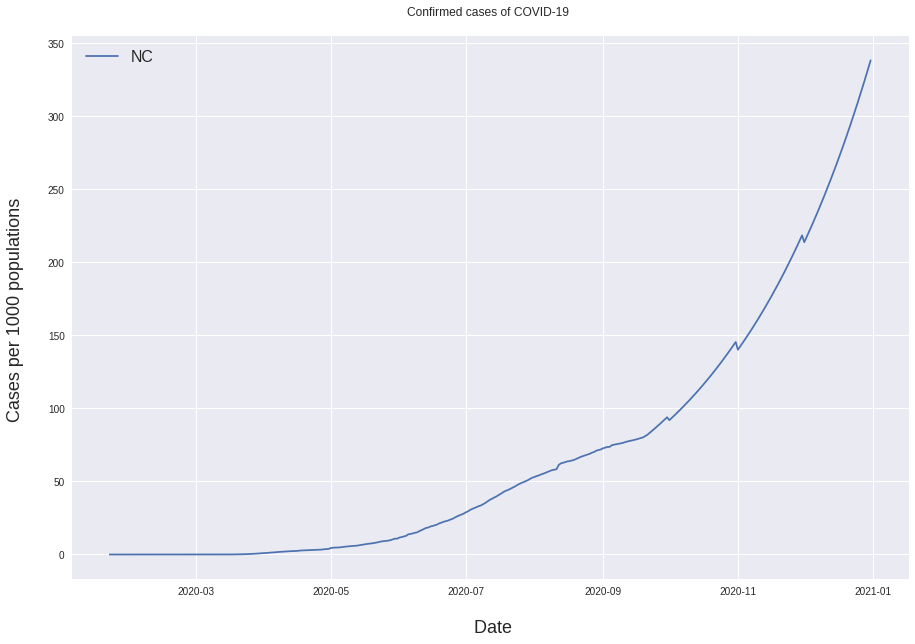

In [ ]:
# Plot all the data, original and predicted to see the whole year.
fig,ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.set_title('Confirmed cases of COVID-19 \n')
#ax1.set_xlim([0,30])

for state in ['NC']:
    ax1.plot(final_result[(final_result.state==state)].date,\
            final_result[(final_result.state==state)].cases_per_1000,\
            label=state)


ax1.set_xlabel("\n Date", fontsize=18)
ax1.set_ylabel("Cases per 1000 populations \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)




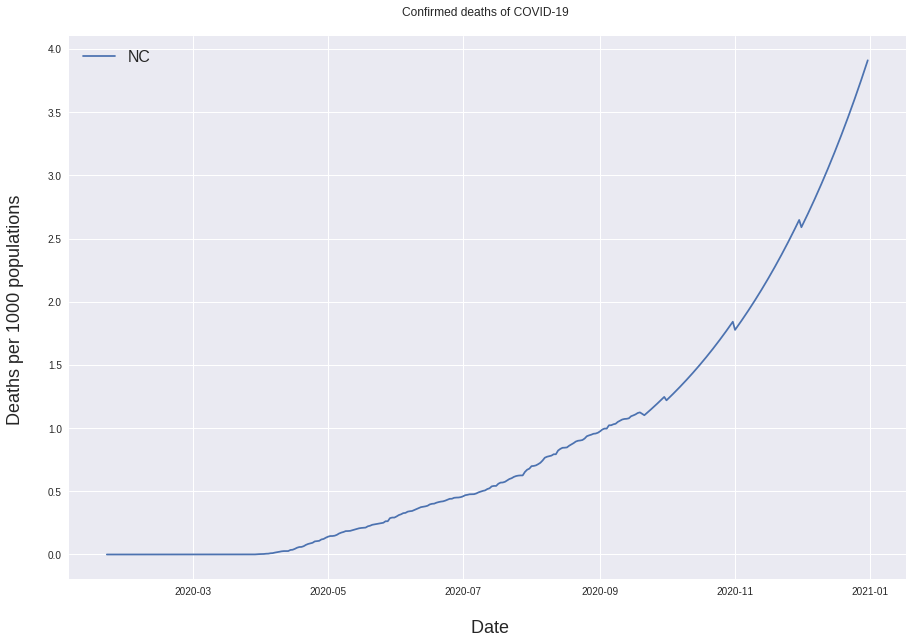

In [ ]:
#Deaths

# Plot all the data, original and predicted to see the whole year.
fig,ax1 = plt.subplots(1,1, figsize=(15,10))
ax1.set_title('Confirmed deaths of COVID-19 \n')
#ax1.set_xlim([0,30])

for state in ['NC']:
    ax1.plot(final_result[(final_result.state==state)].date,\
            final_result[(final_result.state==state)].deaths_per_1000,\
            label=state)


ax1.set_xlabel("\n Date", fontsize=18)
ax1.set_ylabel("Deaths per 1000 populations \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)

# Here, using poisson distribution to predict the confirmed cases of the next months.

#Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [ ]:
# Get the numbers of the last day
NYC_df['total_cases'] = NYC_df['confirmed_9/19/20']
NYC_df['total_deaths'] = NYC_df['deaths_9/19/20']

In [ ]:
# Group by counties.
counties_info = NYC_df.groupby(["countyFIPS", "County Name"]).agg({'population': 'max', 
                                                               'NUM_STAFFED_BEDS': "sum",
                                                               'NUM_LICENSED_BEDS': "sum",
                                                               'NUM_ICU_BEDS': "sum",
                                                               'total_deaths': "max",
                                                               'total_cases': "max"}).reset_index()

counties_info['deaths_per_1000'] = (counties_info['total_deaths'] * 1000) / counties_info['population']
counties_info['cases_per_1000'] = (counties_info['total_cases'] * 1000) / counties_info['population']
counties_info = counties_info[counties_info['population']>0]
counties_info

,countyFIPS,County Name,population,NUM_STAFFED_BEDS,NUM_LICENSED_BEDS,NUM_ICU_BEDS,total_deaths,total_cases,deaths_per_1000,cases_per_1000
1,1001,Autauga County,55869,55.0,85.0,6,24,1673,0.429576,29.945050
2,1003,Baldwin County,223234,362.0,386.0,51,49,5047,0.219501,22.608563
3,1005,Barbour County,24686,30.0,74.0,5,7,830,0.283562,33.622296
4,1007,Bibb County,22394,25.0,35.0,4,10,628,0.446548,28.043226
5,1009,Blount County,57826,25.0,25.0,6,14,1542,0.242106,26.666206
...,...,...,...,...,...,...,...,...,...,...
2458,56037,Sweetwater County,42343,74.0,115.0,13,2,322,0.047233,7.604563
2459,56039,Teton County,23464,48.0,48.0,6,1,493,0.042618,21.010910
2460,56041,Uinta County,20226,105.0,225.0,6,2,330,0.098883,16.315633
2461,56043,Washakie County,7805,18.0,18.0,3,6,113,0.768738,14.477899


In [ ]:
# Correlation between params
corr = counties_info.corr()
corr

,countyFIPS,population,NUM_STAFFED_BEDS,NUM_LICENSED_BEDS,NUM_ICU_BEDS,total_deaths,total_cases,deaths_per_1000,cases_per_1000
countyFIPS,1.000000,-0.059884,-0.047061,-0.040873,-0.046539,-0.036567,-0.071012,-0.113317,-0.170473
population,-0.059884,1.000000,0.942582,0.929695,0.904605,0.773962,0.942313,0.136643,0.074011
NUM_STAFFED_BEDS,-0.047061,0.942582,1.000000,0.991846,0.973667,0.725853,0.899324,0.143241,0.092454
NUM_LICENSED_BEDS,-0.040873,0.929695,0.991846,1.000000,0.973456,0.725241,0.885057,0.146304,0.096244
NUM_ICU_BEDS,-0.046539,0.904605,0.973667,0.973456,1.000000,0.673971,0.860366,0.125755,0.091729
total_deaths,-0.036567,0.773962,0.725853,0.725241,0.673971,1.000000,0.803492,0.332090,0.123775
total_cases,-0.071012,0.942313,0.899324,0.885057,0.860366,0.803492,1.000000,0.181574,0.163971
deaths_per_1000,-0.113317,0.136643,0.143241,0.146304,0.125755,0.332090,0.181574,1.000000,0.590702
cases_per_1000,-0.170473,0.074011,0.092454,0.096244,0.091729,0.123775,0.163971,0.590702,1.000000


#Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.
* For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.


Text(114.0, 0.5, '')

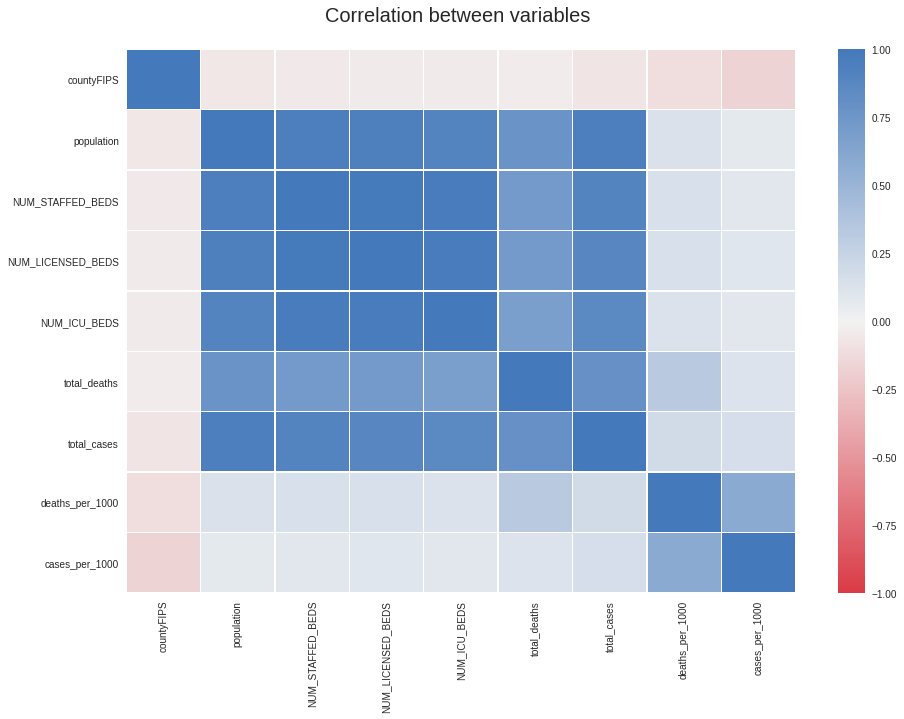

In [ ]:
# Plot the correlationship with a heatmap.
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
ax = sns.heatmap(corr, 
                 xticklabels=corr.columns,
                 yticklabels=corr.columns,
                 cmap=cmap,
                 #annot=True,
                 linewidth=0.5,
                 vmin=-1,
                 vmax=1)

ax.set_title('Correlation between variables \n', fontdict={'fontsize':20})
ax.set_xlabel('')
ax.set_ylabel('')



Watching this heatmap, we can see that cases and deaths are directly related with population. Population is really related with beds. So, the four attributes (deaths, cases, beds and population) have a strong correlation. This means that when one of this grows up, the others too.

**Hipotesis: Death number are higher if the total number of hospital bed is lower.**



1.   1st variable: By counties analyzing the deaths per 1000 population.
With the corelation heatmap, we can see that the deaths_per_1000 correlation with beds is arround 0.14. This means that when one of those grows up, the other does it in a 0.14 percent, which is a really low number to say that the hip is true. The number should be negative, which would mean that when beds increase, deaths decrease, but this isn't the case.

2.   2nd variable: By counties analyzing the total number of deaths- We can see in the heatmap that the correlation between beds and deaths is really strong, which means more beds, more deaths. This is because in this case, we are not looking the population (more population -> more deaths)
 
3. 3th variable: By states.

We have the same results, the correlation is similar evaluating different states.








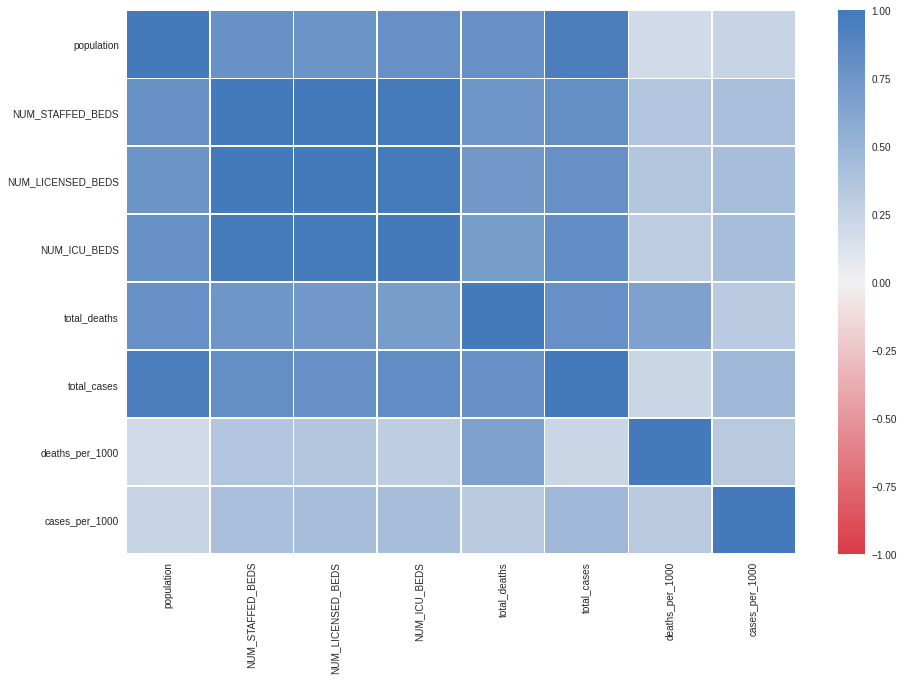

In [ ]:
# 3th variable: By states.
states_info = NYC_df.groupby(["State"]).agg({'population': 'max', 
                                           'NUM_STAFFED_BEDS': "sum",
                                           'NUM_LICENSED_BEDS': "sum",
                                           'NUM_ICU_BEDS': "sum",
                                           'total_deaths': "max",
                                           'total_cases': "max"}).reset_index()

states_info['deaths_per_1000'] = (states_info['total_deaths'] * 1000) / states_info['population']
states_info['cases_per_1000'] = (states_info['total_cases'] * 1000) / states_info['population']

# Filter those states without population
states_info = states_info[states_info['population']>0]

# Correlation between params
corr = states_info.corr()

# Plot heatmap.
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=cmap,
            #annot=True,
            linewidth=0.5,
           vmin=-1,
           vmax=1)



We can say that with the data that we have, we can say if the hipotesis is not True. Probabbly we would need the number of beds free, waiting to be occupied by a person, so in that case we can check the beds free for each date, and see if the deaths grows up. 